# **Importações e Configurações**

In [1]:
import os
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score


pd.set_option('display.max_colwidth', None)

# **Carregamento do Dataset**

In [2]:
path = kagglehub.dataset_download("fredericods/ptbr-sentiment-analysis-datasets")
df = pd.read_csv(os.path.join(path, "utlc_apps.csv"))

print(df.shape)
df.head()

Using Colab cache for faster access to the 'ptbr-sentiment-analysis-datasets' dataset.
(1039535, 8)


,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",1.0,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se tornar prêmio é ainda muito mais caro. Joguei dinheiro no lixo,aplicativo absurdamente caro e o valor para se tornar premio e ainda muito mais caro. joguei dinheiro no lixo,"['aplicativo', 'absurdamente', 'caro', 'valor', 'para', 'se', 'tornar', 'premio', 'ainda', 'muito', 'mais', 'caro', 'joguei', 'dinheiro', 'no', 'lixo']",0.0,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo', 'layout']",1.0,4.0,1,1
3,2066362,"Estava com um problema para acessar, porém consegui resolver pelo fone fácil. Ótimo app","estava com um problema para acessar, porem consegui resolver pelo fone facil. otimo app","['estava', 'com', 'um', 'problema', 'para', 'acessar', 'porem', 'consegui', 'resolver', 'pelo', 'fone', 'facil', 'otimo', 'app']",1.0,5.0,1,1
4,2521806,Eu gostei muito do jogo tenho no celular da minha mãe e no meu celular no meu ela já tem 7 anos no da minha mãe ainda está parabéns para os criadores adorei,eu gostei muito do jogo tenho no celular da minha mae e no meu celular no meu ela ja tem 7 anos no da minha mae ainda esta parabens para os criadores adorei,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho', 'no', 'celular', 'da', 'minha', 'mae', 'no', 'meu', 'celular', 'no', 'meu', 'ela', 'ja', 'tem', 'anos', 'no', 'da', 'minha', 'mae', 'ainda', 'esta', 'parabens', 'para', 'os', 'criadores', 'adorei']",1.0,5.0,1,1


## **Conversão para Sentimento Binário**

In [3]:
df = df.replace({'polarity': {1.0: 'Positivo', 0.0: 'Negativo'}})
df.dropna(subset=["review_text_processed", "polarity"], inplace=True)

df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",Positivo,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se tornar prêmio é ainda muito mais caro. Joguei dinheiro no lixo,aplicativo absurdamente caro e o valor para se tornar premio e ainda muito mais caro. joguei dinheiro no lixo,"['aplicativo', 'absurdamente', 'caro', 'valor', 'para', 'se', 'tornar', 'premio', 'ainda', 'muito', 'mais', 'caro', 'joguei', 'dinheiro', 'no', 'lixo']",Negativo,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo', 'layout']",Positivo,4.0,1,1
3,2066362,"Estava com um problema para acessar, porém consegui resolver pelo fone fácil. Ótimo app","estava com um problema para acessar, porem consegui resolver pelo fone facil. otimo app","['estava', 'com', 'um', 'problema', 'para', 'acessar', 'porem', 'consegui', 'resolver', 'pelo', 'fone', 'facil', 'otimo', 'app']",Positivo,5.0,1,1
4,2521806,Eu gostei muito do jogo tenho no celular da minha mãe e no meu celular no meu ela já tem 7 anos no da minha mãe ainda está parabéns para os criadores adorei,eu gostei muito do jogo tenho no celular da minha mae e no meu celular no meu ela ja tem 7 anos no da minha mae ainda esta parabens para os criadores adorei,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho', 'no', 'celular', 'da', 'minha', 'mae', 'no', 'meu', 'celular', 'no', 'meu', 'ela', 'ja', 'tem', 'anos', 'no', 'da', 'minha', 'mae', 'ainda', 'esta', 'parabens', 'para', 'os', 'criadores', 'adorei']",Positivo,5.0,1,1


# **Limpeza de Texto**

In [4]:
def clean_text_value(text_input):
    text = str(text_input).lower().strip()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+|www\S+", "", text)

    if len(text) < 5:
        return None
    return text

df["review_text_processed"] = df["review_text_processed"].apply(clean_text_value)
df.dropna(subset=["review_text_processed"], inplace=True)
df.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,2483729,eu curtindo muito,eu curtindo muito,"['eu', 'curtindo', 'muito']",Positivo,5.0,1,1
1,2865805,Aplicativo absurdamente caro e o valor para se tornar prêmio é ainda muito mais caro. Joguei dinheiro no lixo,aplicativo absurdamente caro e o valor para se tornar premio e ainda muito mais caro. joguei dinheiro no lixo,"['aplicativo', 'absurdamente', 'caro', 'valor', 'para', 'se', 'tornar', 'premio', 'ainda', 'muito', 'mais', 'caro', 'joguei', 'dinheiro', 'no', 'lixo']",Negativo,1.0,1,1
2,2734161,Não é mais tão simples com o novo layout,nao e mais tao simples com o novo layout,"['nao', 'mais', 'tao', 'simples', 'com', 'novo', 'layout']",Positivo,4.0,1,1
3,2066362,"Estava com um problema para acessar, porém consegui resolver pelo fone fácil. Ótimo app","estava com um problema para acessar, porem consegui resolver pelo fone facil. otimo app","['estava', 'com', 'um', 'problema', 'para', 'acessar', 'porem', 'consegui', 'resolver', 'pelo', 'fone', 'facil', 'otimo', 'app']",Positivo,5.0,1,1
4,2521806,Eu gostei muito do jogo tenho no celular da minha mãe e no meu celular no meu ela já tem 7 anos no da minha mãe ainda está parabéns para os criadores adorei,eu gostei muito do jogo tenho no celular da minha mae e no meu celular no meu ela ja tem anos no da minha mae ainda esta parabens para os criadores adorei,"['eu', 'gostei', 'muito', 'do', 'jogo', 'tenho', 'no', 'celular', 'da', 'minha', 'mae', 'no', 'meu', 'celular', 'no', 'meu', 'ela', 'ja', 'tem', 'anos', 'no', 'da', 'minha', 'mae', 'ainda', 'esta', 'parabens', 'para', 'os', 'criadores', 'adorei']",Positivo,5.0,1,1


# **Pipeline de Modelagem**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
df["review_text_processed"],
df["polarity"],
test_size=0.1,
random_state=42,
stratify=df["polarity"]
)

In [6]:
pipeline_pt = Pipeline([
  ("tfidf", TfidfVectorizer(
  max_df=0.9,
  min_df=5,
  max_features=200_000,
  strip_accents='unicode',
  ngram_range=(1,2))),

  ("clf", LogisticRegression(
  solver="saga",
  max_iter=1000,
  class_weight="balanced",
  n_jobs=-1
  ))
])

# **Treinamento do Modelo**

In [7]:
pipeline_pt.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=200000, min_df=5,
                                 ngram_range=(1, 2), strip_accents='unicode')),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, solver='saga'))])

# **Avaliação no Conjunto de Teste**

In [8]:
y_pred = pipeline_pt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.78      0.92      0.84     21550
    Positivo       0.97      0.92      0.95     71276

    accuracy                           0.92     92826
   macro avg       0.88      0.92      0.89     92826
weighted avg       0.93      0.92      0.92     92826



# **Serialização do Modelo**

In [9]:
model_filename = "sentiment_pt.joblib"
joblib.dump(pipeline_pt, model_filename)
print(f"Modelo salvo: {model_filename}")

Modelo salvo: sentiment_pt.joblib


# **Ajuste de Threshold (priorizando Recall de Negativo)**

In [10]:
idx_neg = list(pipeline_pt.classes_).index("Negativo")
y_proba_neg = pipeline_pt.predict_proba(X_test)[:, idx_neg]

precision, recall, thresholds = precision_recall_curve(
    y_test == "Negativo",
    y_proba_neg
)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Melhor threshold: {best_threshold:.3f}")

Melhor threshold: 0.624


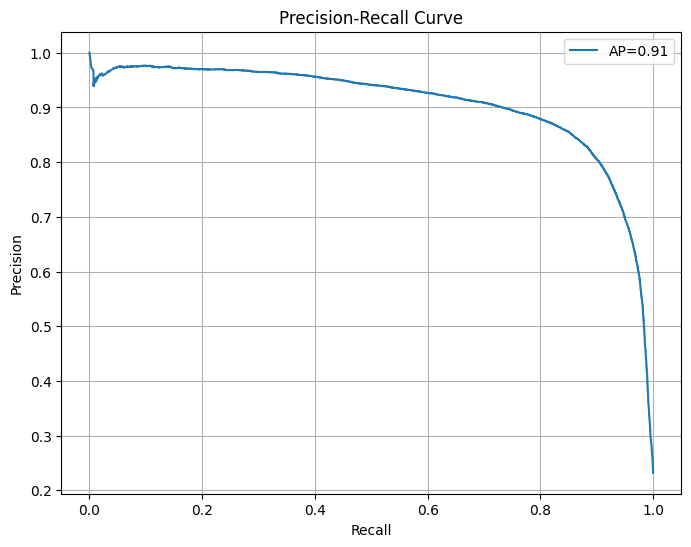

In [11]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"AP={average_precision_score(y_test=='Negativo', y_proba_neg):.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision‑Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df_auditoria = pd.DataFrame({
    'Texto': X_test,
    'Real': y_test,
    'Predito': y_pred
})

falsos_negativos = df_auditoria[
    (df_auditoria['Real'] == 'Positivo') &
    (df_auditoria['Predito'] == 'Negativo')
]

falsos_negativos.sample(10)

,Texto,Real,Predito
905126,sugiro aos responsaveis que deem a possibilidade de fazer a pesquisa pelo chassi do veiculo tambem. pois ja houve ocasioes que o veiculo nao tinha placa e nao idetificamos de imediato que era fruto de roubo. recomendado pelo sgt bezerra do ° bpm do sertao alagoano.,Positivo,Negativo
698318,"por favor, nao consegui atualizar o premium. ja esta pago porem nao atualiza. gentileza liberar os acessos do pacote",Positivo,Negativo
836164,"o jogo e bom, e viciante, e bem legal, os graficos sao perfeitos, os personagens sao bem criativos, mas por um lado tem os bugs, o lag ainda continua, e na ultima atualizacao o jogo ta saindo, ta travando demais, antes nao era assim, eu entro no combate o jogo fecha sozinho, poxa assim nao da ne supercell, resolvam isso logo pois nao queremos outra atualizacao que dure meses...",Positivo,Negativo
938536,"gostei muito!!! eu ganhei reais na primeira recarga e ainda recebi reais de volta, paguei uma conta de luz recebi mais de volta assim como o prometido, depois de ganhar meus premios indiquei amigos todos ganharam o mesmo que eu, so nao entendi aparte que eu receberia % das contas pagas, entao paguei uma fatura de reais e desncotou do meu cartao e do valor que eu ja tinha conquistado, e nao recebi a porcentagem pelo pagamento da conta, sendo que os eu ia deixar pra recargas!",Positivo,Negativo
249125,muito bom comparando com os outros banco fomo caixa que e um lixo,Positivo,Negativo
1022895,o jogo e legal mas nao e so adulto que joga crianca tambem joga esse jogo entao porque voces nao colocam domingo uma hora da tarde,Positivo,Negativo
231277,quando voce quer colocar um video da galeria ele nao adiciona !!! arruma isso por favor !!,Positivo,Negativo
954445,mas queria saber como faz para ele nao ser desinstalado por outra pessoa .nao sendo eu,Positivo,Negativo
33309,"sincroniza emails, contatos, calendario e pastas.",Positivo,Negativo
365464,"o aplicativo e muito bom , porem alguns filmes nao estao sendo exibidos no recado diz : falha no streaming do filme , tente usar o reprodutor do seu aparelho apertando em cine play , se o problema persistir entre em contato ! ja fiz varias vezes o q pediram e o problema continua ! quero um retorno",Positivo,Negativo


# **Função de Inferência (simulando API)**

In [13]:
def analisar_sentimento(texto, threshold=best_threshold):
    pipeline = joblib.load(model_filename)
    idx_neg = list(pipeline.classes_).index("Negativo")
    prob_neg = pipeline.predict_proba([texto])[0, idx_neg]

    return {
        "previsao": "Negativo" if prob_neg >= threshold else "Positivo",
        "probabilidade": round(float(prob_neg), 4)
    }

exemplos = [
    "O atendimento foi excelente",
    "Péssima experiência, não recomendo",
    "É ok, nada demais"
]

for e in exemplos:
    print(analisar_sentimento(e))

{'previsao': 'Positivo', 'probabilidade': 0.0343}
{'previsao': 'Negativo', 'probabilidade': 0.9984}
{'previsao': 'Positivo', 'probabilidade': 0.461}
